In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, RocCurveDisplay

from statistics import stdev
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Data & More Information about this data set

In [3]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
samples, features = data.shape
print('Number Of Samples: ', samples)
print('Number Of Features: ', features)

Number Of Samples:  100000
Number Of Features:  9


In [5]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [8]:
#unique valuse

In [9]:
d = []
u = []
t = []
for col in data:
    d.append(col)
    u.append(data[col].nunique())
    t.append(data[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})


,column,type,unique value
0,gender,object,3
1,age,float64,102
2,hypertension,int64,2
3,heart_disease,int64,2
4,smoking_history,object,6
5,bmi,float64,4247
6,HbA1c_level,float64,18
7,blood_glucose_level,int64,18
8,diabetes,int64,2


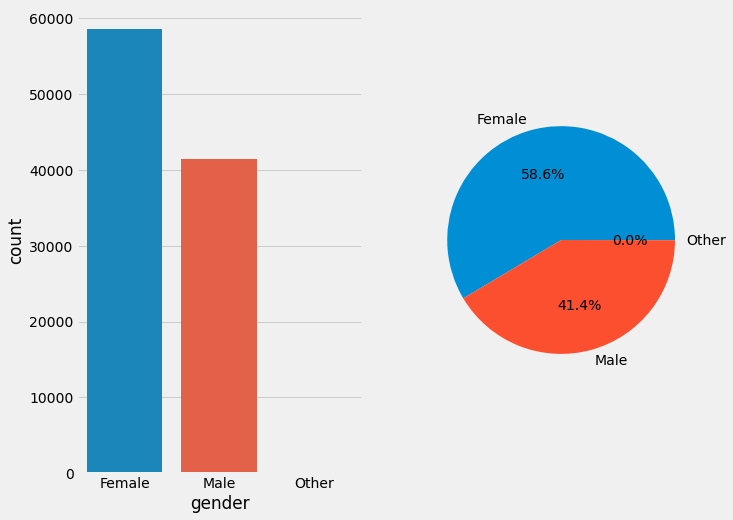

In [10]:
labels = ['Female', 'Male', 'Other']
values = data['gender'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.countplot(x=data['gender'], data=data)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('FirstImage')
plt.show()

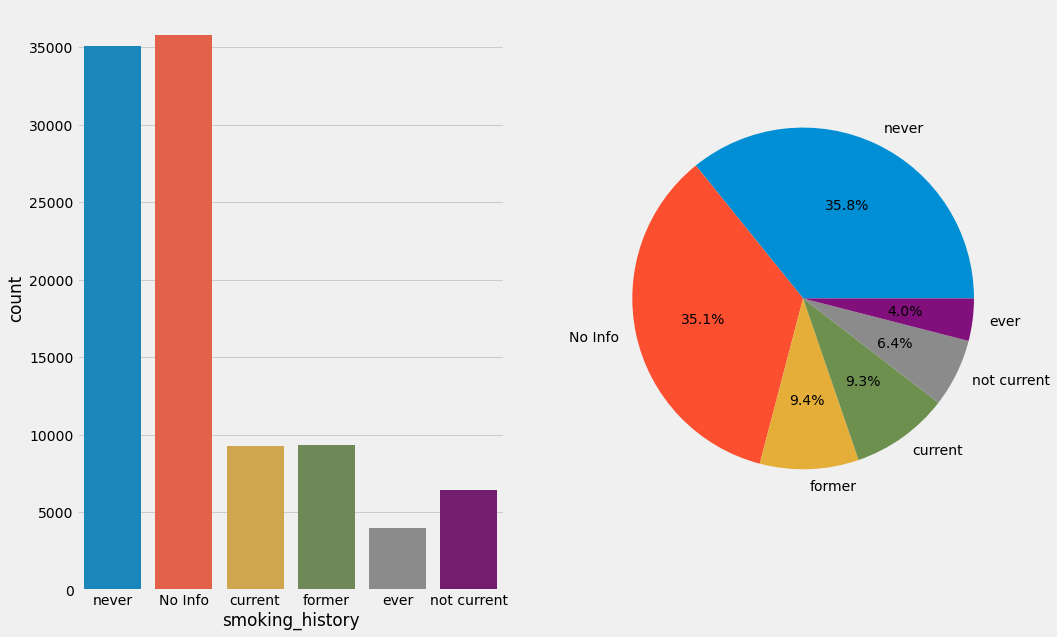

In [11]:
labels = ['never', 'No Info', 'former', 'current', 'not current', 'ever']
values = data['smoking_history'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(x=data['smoking_history'], data=data)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('Image')
plt.show()

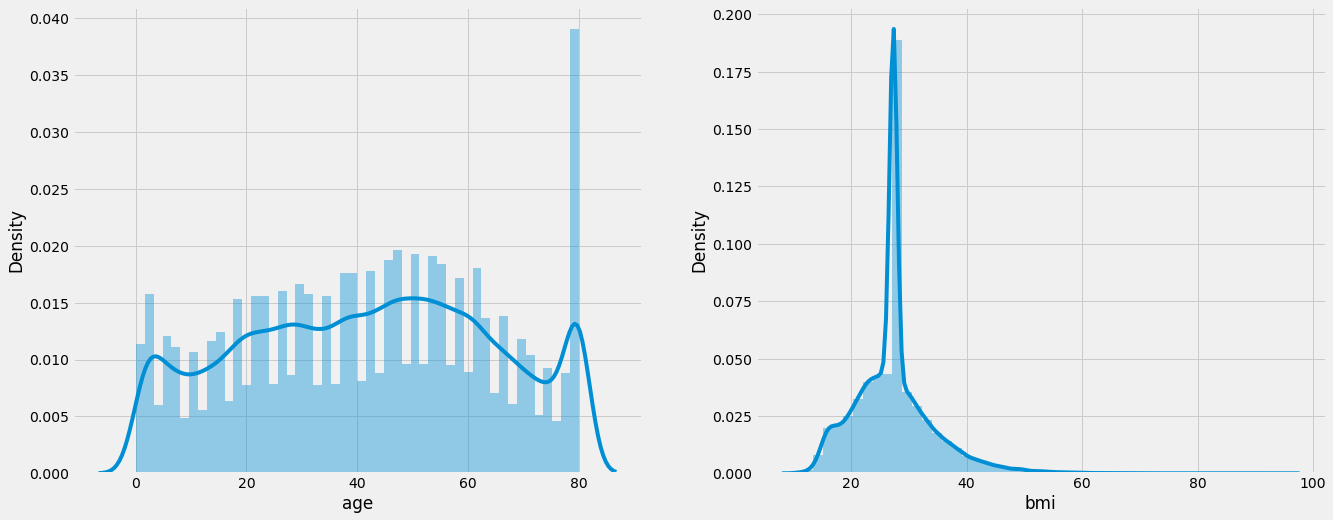

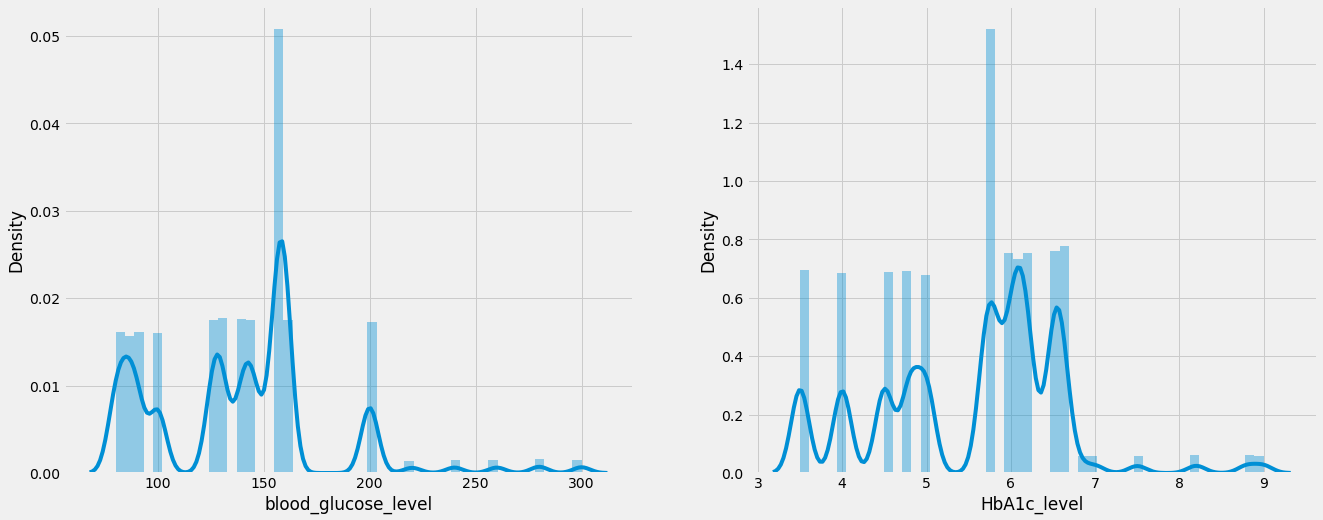

<Figure size 432x288 with 0 Axes>

In [12]:
numerical = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
i = 0

while i < 4:
  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  sns.distplot(data[numerical[i]])
  i += 1
  if i == 4:
    break
  plt.subplot(1, 2, 2)
  sns.distplot(data[numerical[i]])
  i += 1
  plt.show()

plt.savefig('2')

In [13]:
#Preprocessing and Cleaning Data

In [14]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [15]:
data.duplicated().sum()

3854

In [16]:
data = data.drop_duplicates()

In [17]:
test = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
z = np.abs(stats.zscore(test))
data = data[(z < 3).all(axis=1)]

In [18]:
data.shape

(92542, 9)

In [19]:
data['smoking_history'].replace({'never': 2, 'No Info': 3, 'current': 4, 'former': 5,
                                'not current': 6, 'ever': 7}, inplace=True)

In [20]:
data['gender'].replace({'Male': 2, 'Female': 3, 'Other': 3}, inplace=True)

In [21]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,3,80.0,0,1,2,25.19,6.6,140,0
1,3,54.0,0,0,3,27.32,6.6,80,0
2,2,28.0,0,0,2,27.32,5.7,158,0
3,3,36.0,0,0,4,23.45,5.0,155,0
4,2,76.0,1,1,4,20.14,4.8,155,0


In [22]:
#Exploring Categorical Features

In [23]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

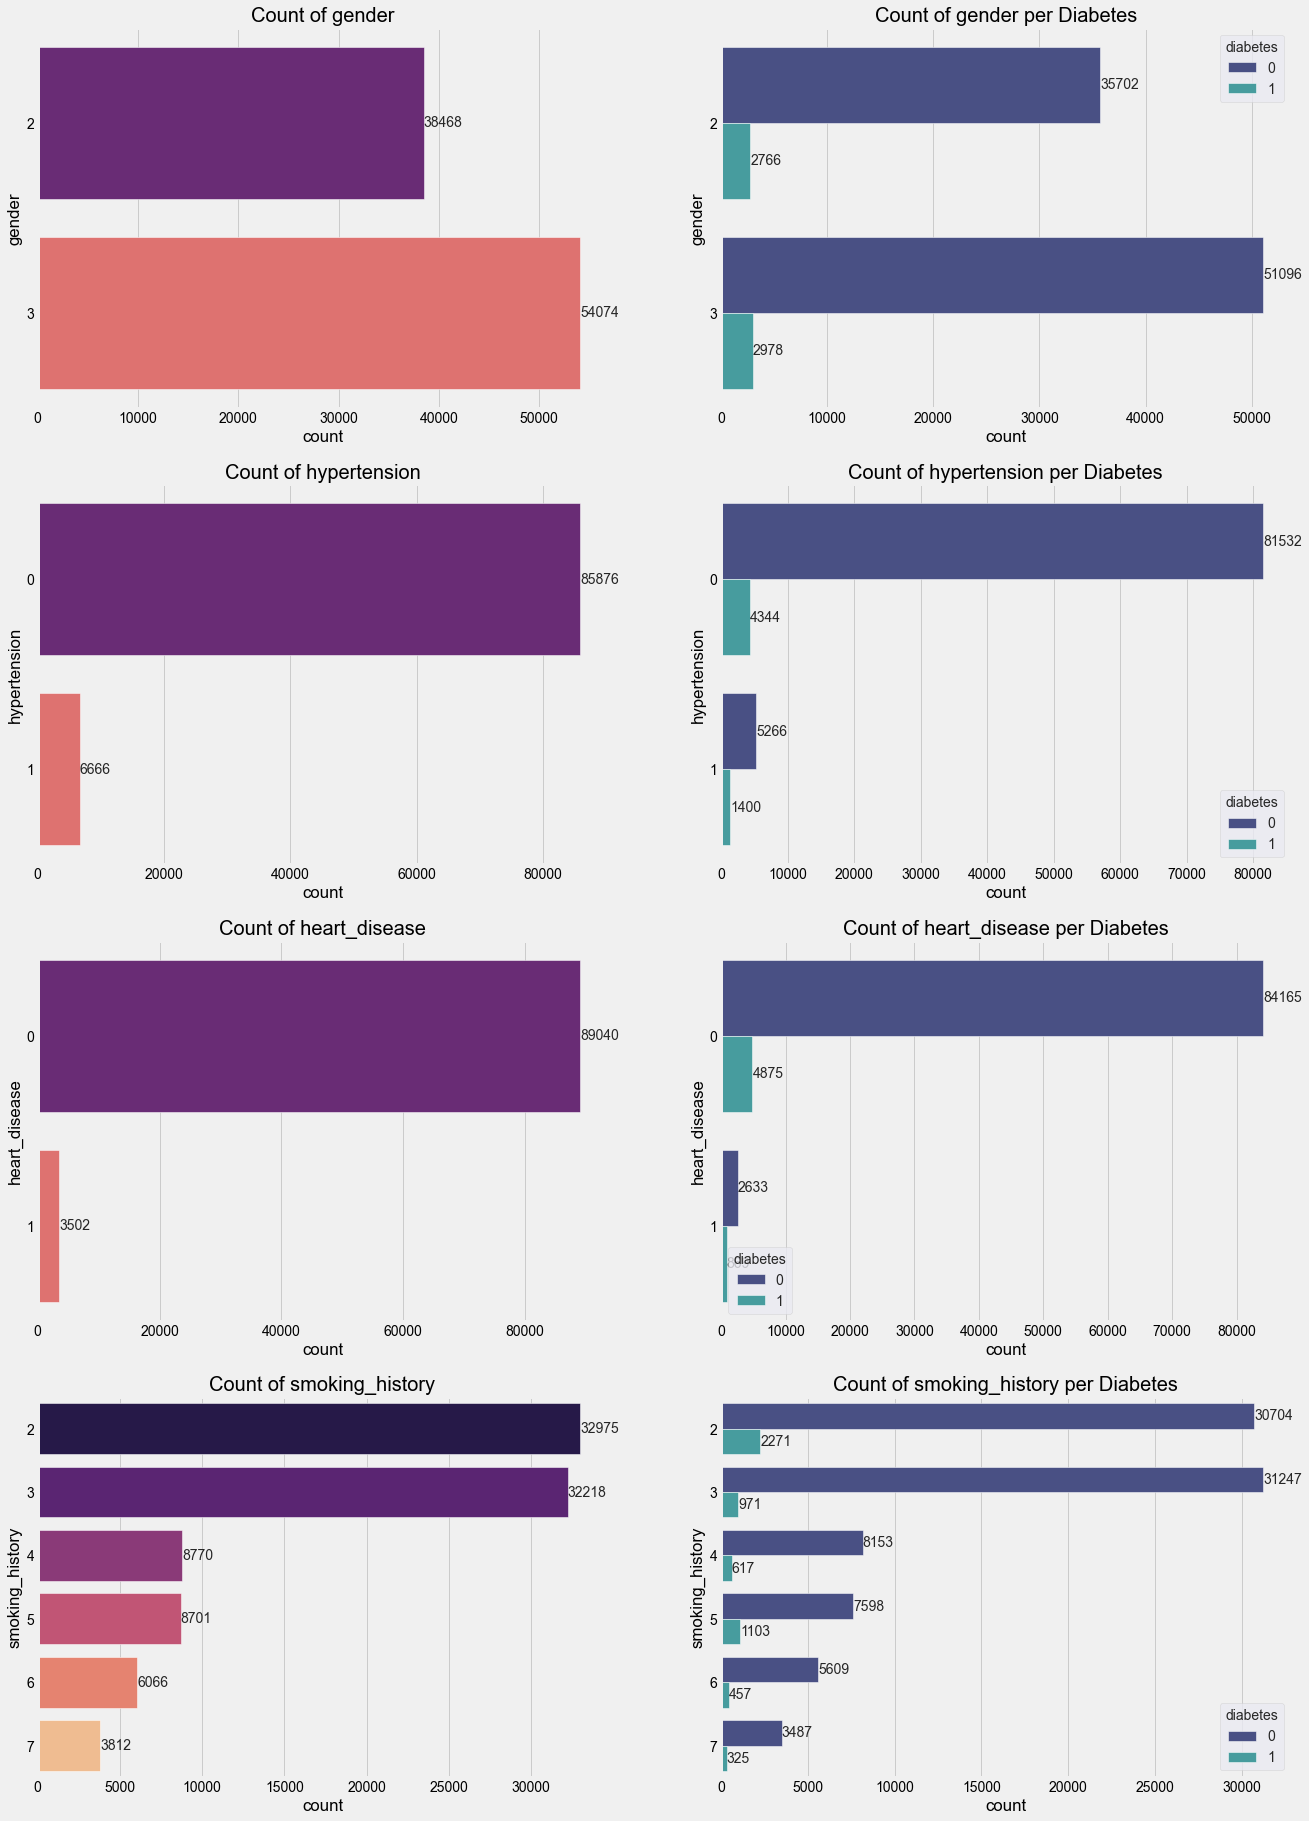

In [24]:
fig, axes = plt.subplots(4,2, figsize=(20,30))
sns.set_style('darkgrid')
idx = 0
for col in categorical_columns:
    sns.countplot(data=data, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='20')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=data, y=col, palette='mako', orient='h',  hue='diabetes',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Diabetes', fontsize='20')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

In [25]:
#Exploring Numerical Features

In [26]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

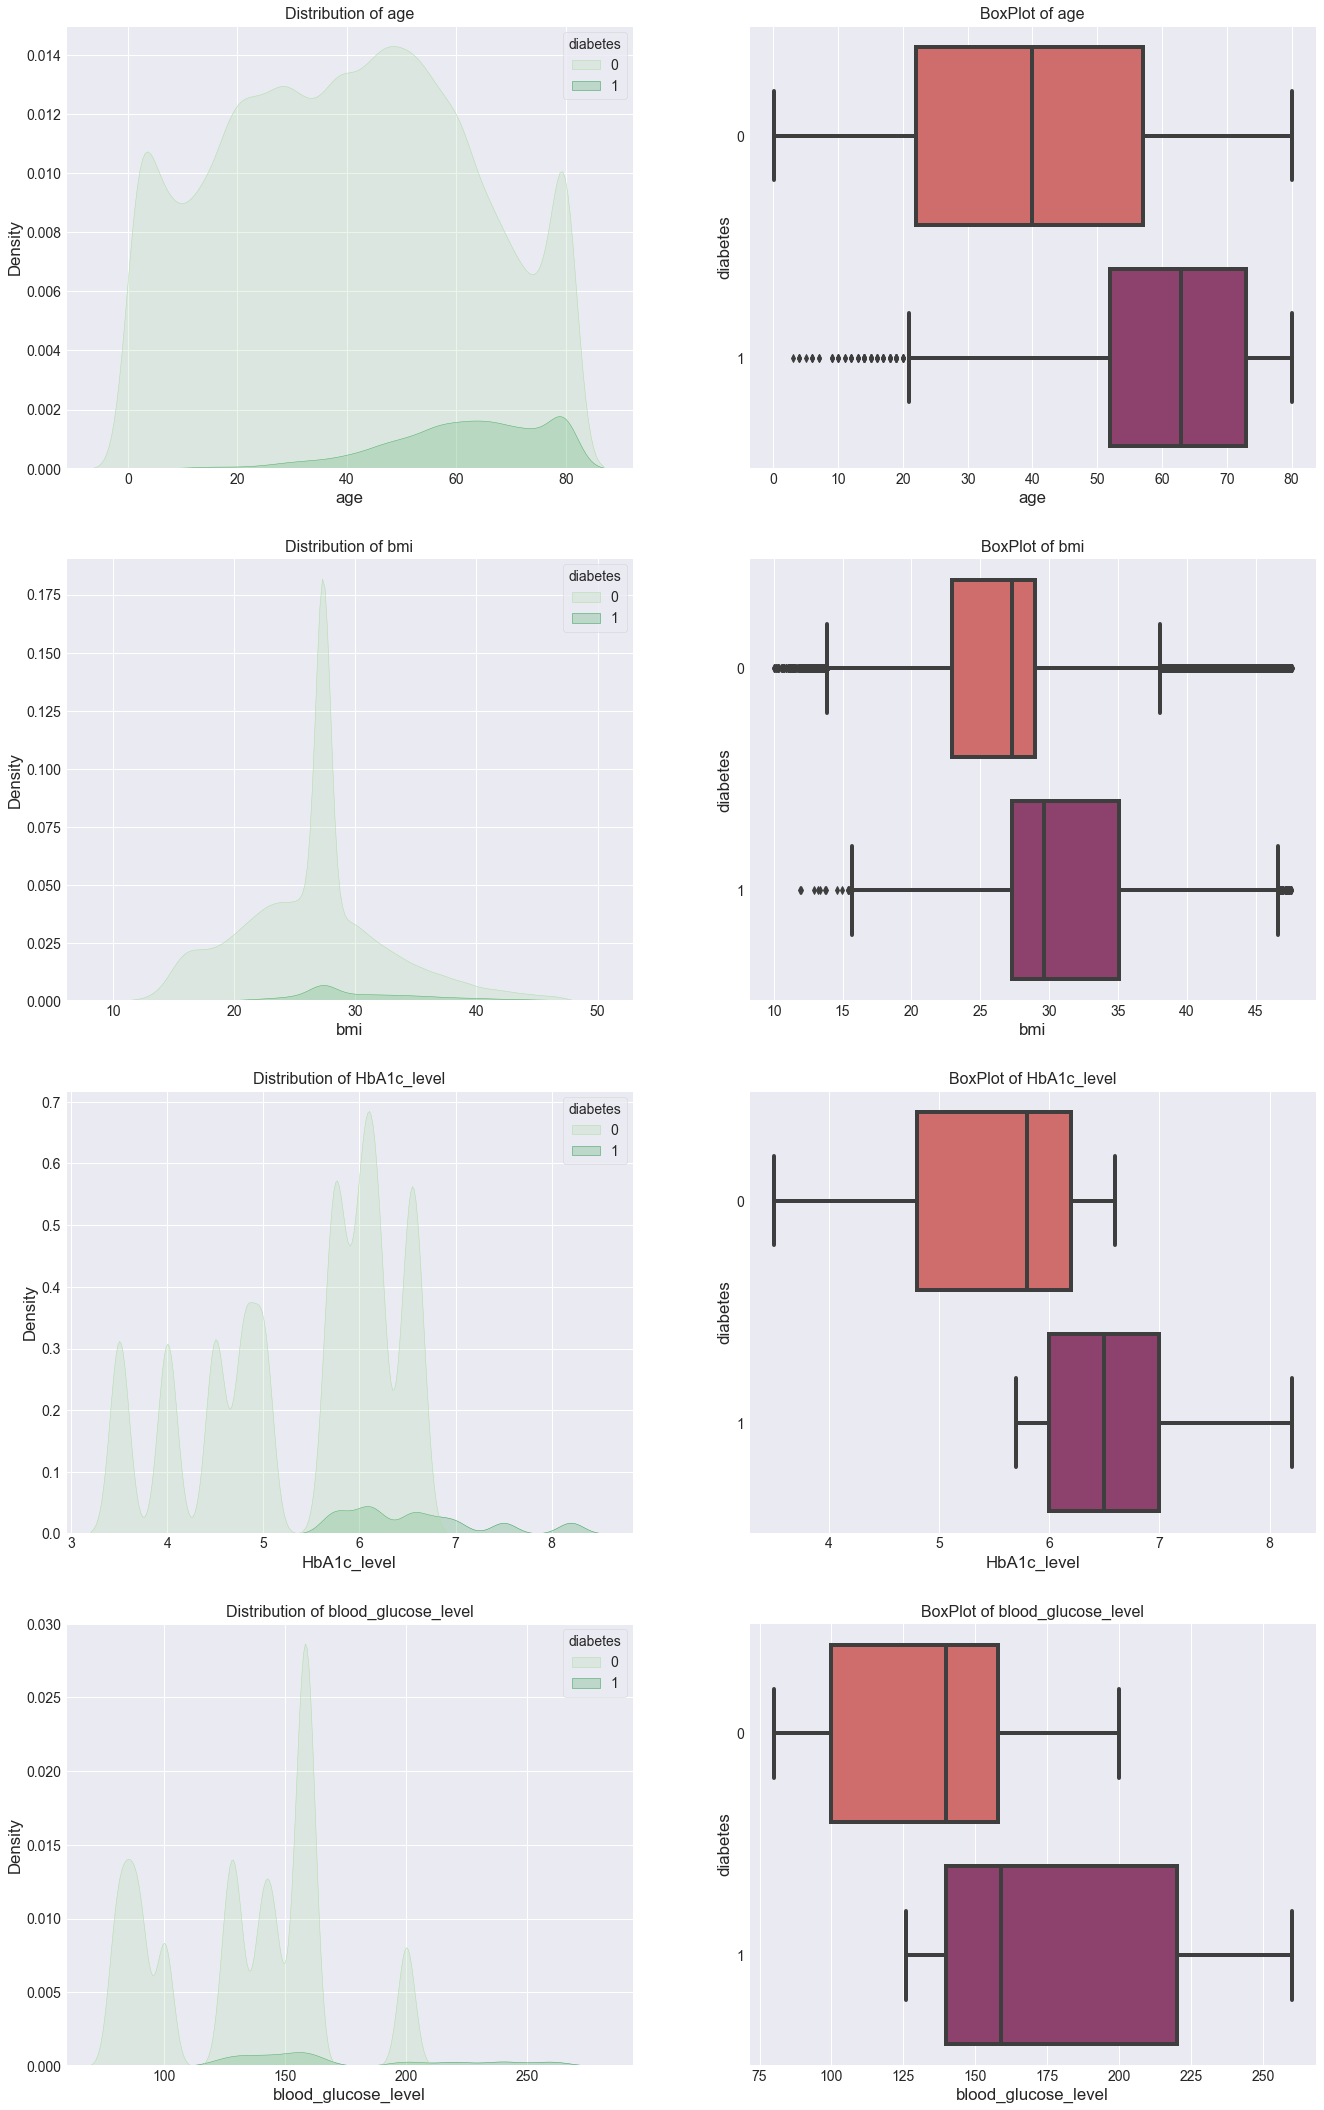

In [27]:
fig, axes = plt.subplots(4,2, figsize=(20,35))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_columns):
    sns.kdeplot(data=data, x=col, palette='Greens',fill=True , hue='diabetes',
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=data, x=col, palette='flare' , y='diabetes', orient='h',
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

In [28]:
#Correlation Between The Features

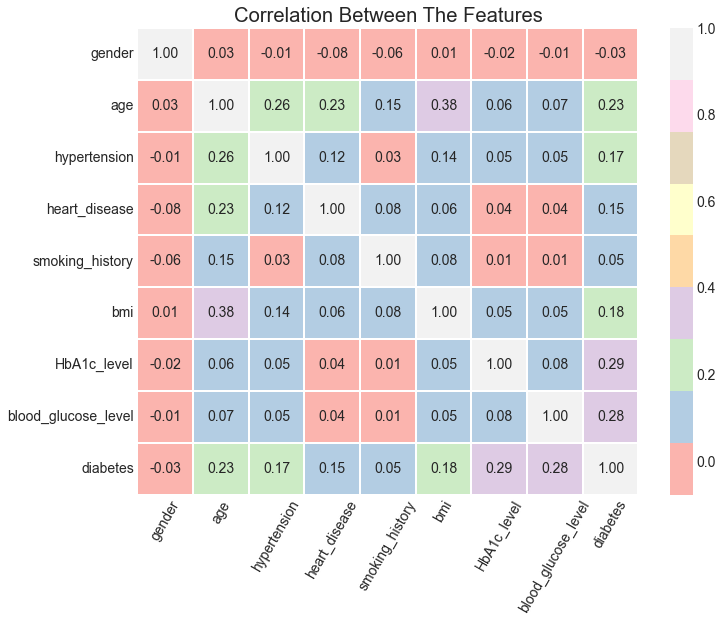

In [29]:
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Correlation Between The Features')
a = sns.heatmap(data.corr(), annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=60)
a.set_yticklabels(a.get_yticklabels())
plt.show()

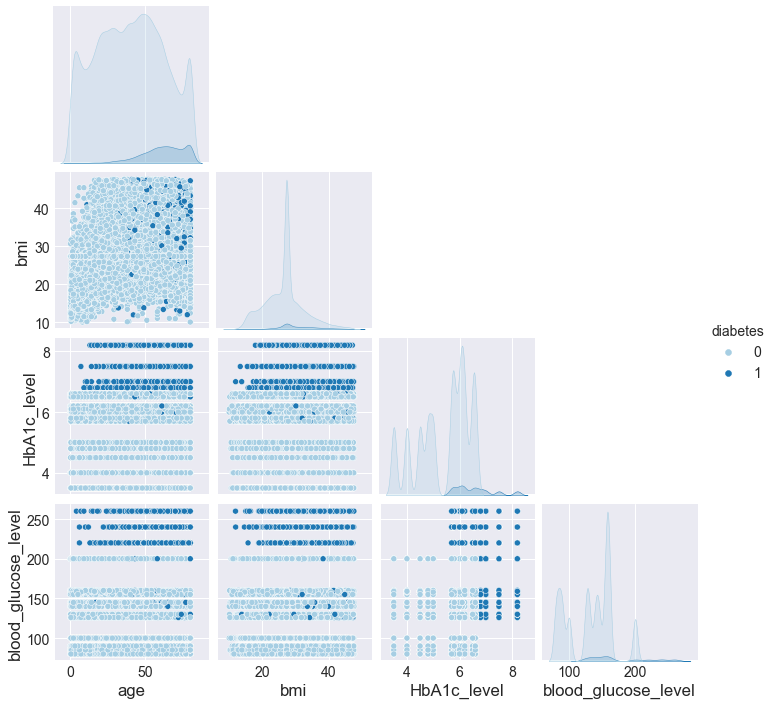

In [30]:
# Pairplot based on Personal Loan
sns.set_palette(sns.color_palette("Paired", 8))
sns.pairplot(data, x_vars=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], y_vars=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], hue='diabetes',corner=True)
plt.show()

In [31]:
#Data and Target Split
target = data['diabetes']
data.drop('diabetes', axis=1, inplace=True)

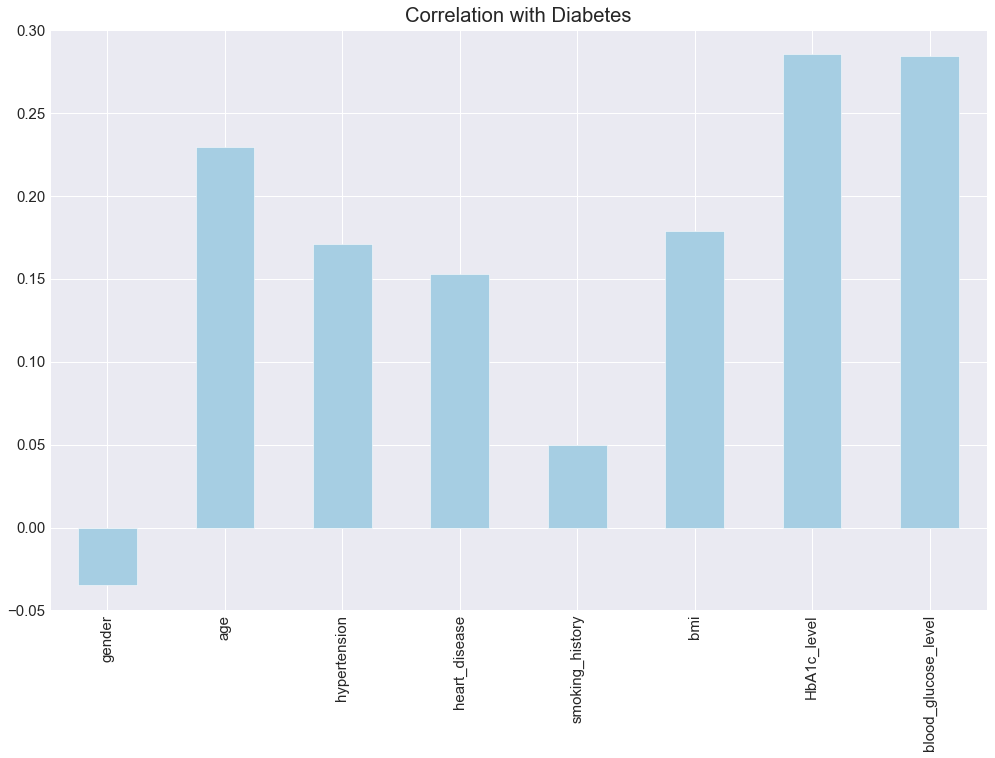

In [32]:
data.corrwith(target).plot.bar(
    figsize=(15, 10), title='Correlation with Diabetes',
    fontsize=15, rot=90, grid=True)
plt.savefig('5')
plt.show()

In [33]:
#Train Test Split

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.35, random_state=42)

In [35]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

In [36]:
#Feature Scaling Using StandardScaler
cols = xtrain.columns

scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)

xtest = scaler.transform(xtest)

xtrain = pd.DataFrame(xtrain, columns=[cols])
xtest = pd.DataFrame(xtest, columns=[cols])

In [37]:
#Logistic Regression
lg = LogisticRegression()
param = {
    'penalty': ['l1', 'l2', 'elasticnet']}

gridSearch = GridSearchCV(lg, param, cv=5, scoring='accuracy')
gridSearch.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [38]:
Logistic = gridSearch.best_estimator_
Logistic.fit(xtrain, ytrain)

LogisticRegression()

In [39]:
ypred = Logistic.predict(xtest)

In [40]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(ytest, ypred)))

Model Accuracy Score: 0.9591


In [41]:
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [42]:
score = cross_val_score(Logistic, xtrain, ytrain, cv=kf, scoring='accuracy')
lg_model_cv_score = score.mean()
lg_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are: {}'.format(score))

Cross Validation Accuracy scores are: [0.96001995 0.95844069 0.95827099 0.95735661 0.95951787]


In [43]:
accuracy = ['Cross Validation Accuracy']
random_a = pd.DataFrame({'CV Mean':lg_model_cv_score,'Std':lg_model_cv_stdev},index=accuracy)
random_a

,CV Mean,Std
Cross Validation Accuracy,0.958721,0.001057


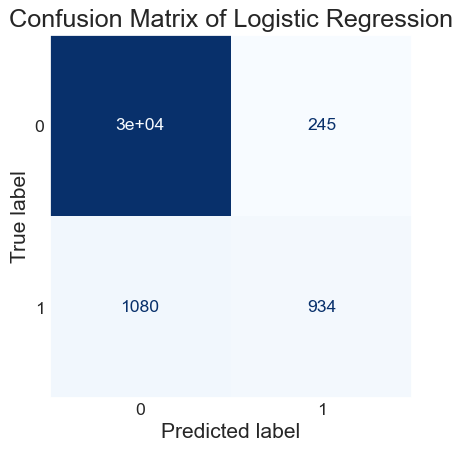

In [44]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(Logistic, xtest, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression')
plt.grid()

In [45]:
lg_result = metrics_calculator(ytest, ypred, 'Logistic')
lg_result

,Logistic
Accuracy,0.959092
Precision,0.878797
Recall,0.727844
F1-score,0.781758


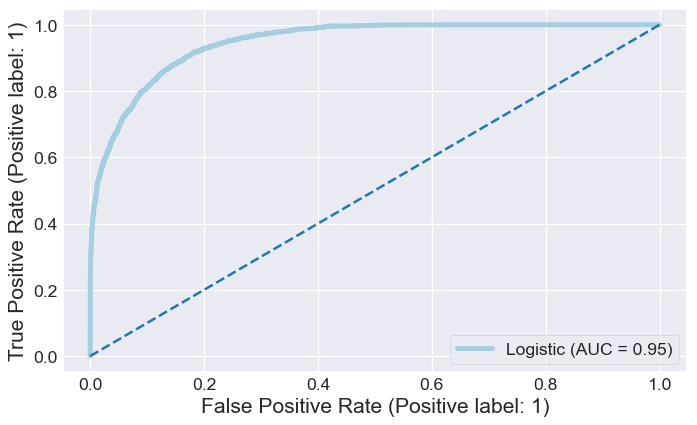

In [46]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
RocCurveDisplay.from_estimator(Logistic, xtest, ytest, ax=ax, name='Logistic')
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2)

sns.set_style('darkgrid')

plt.show()

In [47]:
#DecisionTreeClassifier
tree = DecisionTreeClassifier()

param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1, 10)]}

gridSearch = GridSearchCV(tree, param, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

In [48]:
Tree = gridSearch.best_estimator_
Tree.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [49]:
ypred = Tree.predict(xtest)

In [50]:
kf = StratifiedKFold(n_splits=10, shuffle=False)

In [51]:
score = cross_val_score(Tree, xtrain, ytrain, cv=kf, scoring='accuracy')
tree_model_cv_score = score.mean()
tree_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are: {}'.format(score))

Cross Validation Accuracy scores are: [0.97140957 0.97140957 0.97057357 0.9684123  0.97256858 0.97090607
 0.97223608 0.9677473  0.97073982 0.96990856]


In [52]:
accuracy = ['Cross Validation Accuracy']
random_a = pd.DataFrame({'CV Mean':tree_model_cv_score,'Std':tree_model_cv_stdev},index=accuracy)
random_a

,CV Mean,Std
Cross Validation Accuracy,0.970591,0.001541


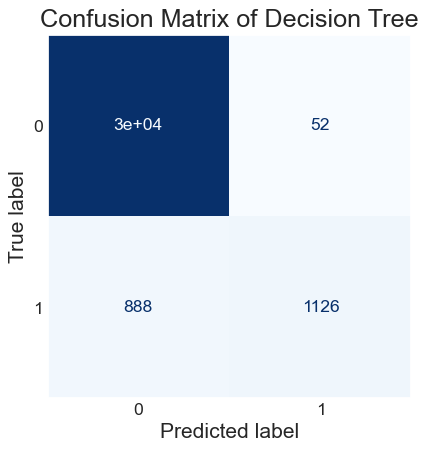

In [53]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(Tree, xtest, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Decision Tree')
plt.grid()

In [54]:
tree_result = metrics_calculator(ytest, ypred, 'Decision Tree')
tree_result

,Decision Tree
Accuracy,0.970979
Precision,0.963703
Recall,0.778687
F1-score,0.845126


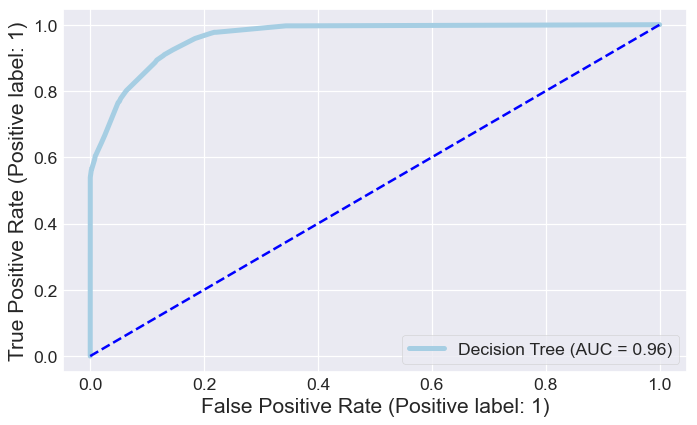

In [55]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
RocCurveDisplay.from_estimator(Tree, xtest, ytest, ax=ax, name='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2, c='blue')

sns.set_style('darkgrid')

plt.show()

In [ ]:
#KNeighborsCLassifier
knn = KNeighborsClassifier()
param = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['unoform', 'distance']}

gridSearch = GridSearchCV(knn, param, cv=5, scoring='accuracy')
gridSearch.fit(xtrain, ytrain)

In [57]:
KNN = gridSearch.best_estimator_
KNN.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [58]:
ypred = KNN.predict(xtest)

In [59]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(ytest, ypred)))

Model Accuracy Score: 0.9608


In [60]:
kf = StratifiedKFold(n_splits=10, shuffle=False)

In [61]:
score = cross_val_score(Logistic, xtrain, ytrain, cv=kf, scoring='accuracy')
knn_model_cv_score = score.mean()
knn_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are: {}'.format(score))

Cross Validation Accuracy scores are: [0.96060505 0.95960771 0.95810474 0.95843724 0.95876974 0.95727348
 0.95843724 0.95660848 0.9605985  0.95893599]


In [62]:
accuracy = ['Cross Validation Accuracy']
random_a = pd.DataFrame({'CV Mean':knn_model_cv_score,'Std':knn_model_cv_stdev},index=accuracy)
random_a

,CV Mean,Std
Cross Validation Accuracy,0.958738,0.001291


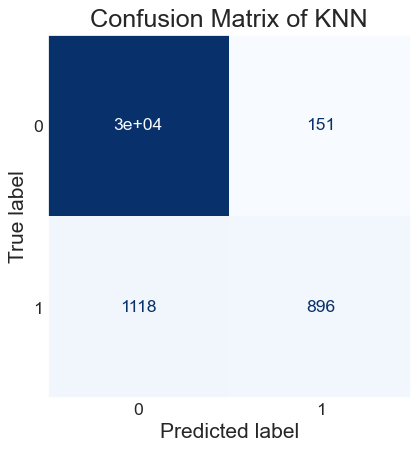

In [63]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(KNN, xtest, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of KNN')
plt.grid()

In [64]:
knn_result = metrics_calculator(ytest, ypred, 'KNN')
knn_result

,KNN
Accuracy,0.960821
Precision,0.910054
Recall,0.719957
F1-score,0.782434


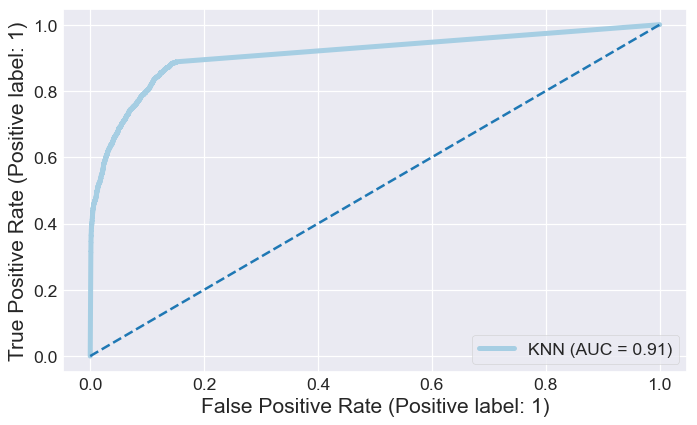

In [65]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
RocCurveDisplay.from_estimator(KNN, xtest, ytest, ax=ax, name='KNN')
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2)

sns.set_style('darkgrid')

plt.show()

In [84]:
#Random Forest
random = RandomForestClassifier()
parameter = {
    'criterion': ['gini', 'entropy']}

gridSearch = GridSearchCV(random, parameter, cv=5, scoring='accuracy')
gridSearch.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [123]:
Random = gridSearch.best_estimator_
Random.fit(xtrain, ytrain)

LogisticRegression()

In [117]:
ypred = Random.predict(xtest)

In [119]:
kf = StratifiedKFold(n_splits=10, shuffle=False)

In [121]:
score = cross_val_score(Random, xtrain, ytrain, cv=kf, scoring='accuracy')
r_model_cv_score = score.mean()
r_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are: {}'.format(score))

Cross Validation Accuracy scores are: [0.96060505 0.95960771 0.95810474 0.95843724 0.95876974 0.95727348
 0.95843724 0.95660848 0.9605985  0.95893599]


In [150]:
accuracy = ['Cross Validation Accuracy']
random_a = pd.DataFrame({'CV Mean':r_model_cv_score,'Std':r_model_cv_stdev},index=accuracy)
random_a

,CV Mean,Std
Cross Validation Accuracy,0.958738,0.001291


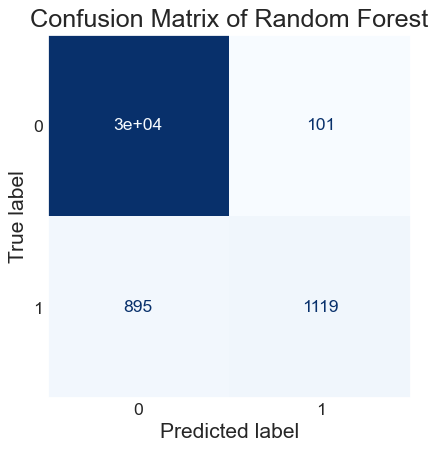

In [151]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(Random, xtest, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Random Forest')
plt.grid()

In [152]:
r_result = metrics_calculator(ytest, ypred, 'Random')
r_result

,Random
Accuracy,0.960821
Precision,0.910054
Recall,0.719957
F1-score,0.782434


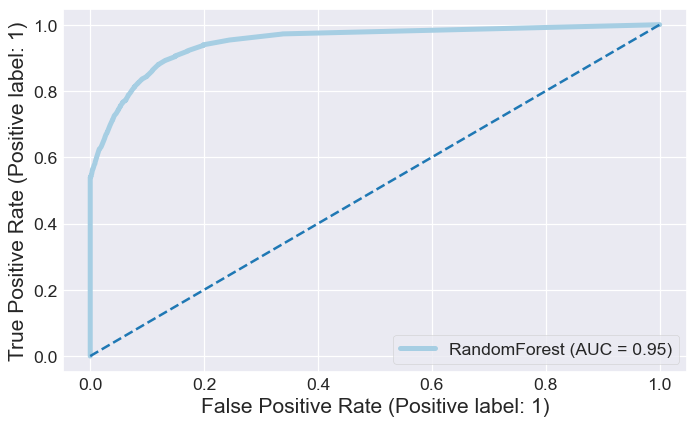

In [153]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
RocCurveDisplay.from_estimator(Random, xtest, ytest, ax=ax, name='RandomForest')
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2)

sns.set_style('darkgrid')

plt.show()

In [154]:
#Conclusion
Conclusion = pd.concat([lg_result, knn_result, tree_result, r_result], axis=1)
Conclusion

,Logistic,KNN,Decision Tree,Random
Accuracy,0.959092,0.960821,0.971349,0.960821
Precision,0.878797,0.910054,0.985178,0.910054
Recall,0.727844,0.719957,0.769613,0.719957
F1-score,0.781758,0.782434,0.842800,0.782434


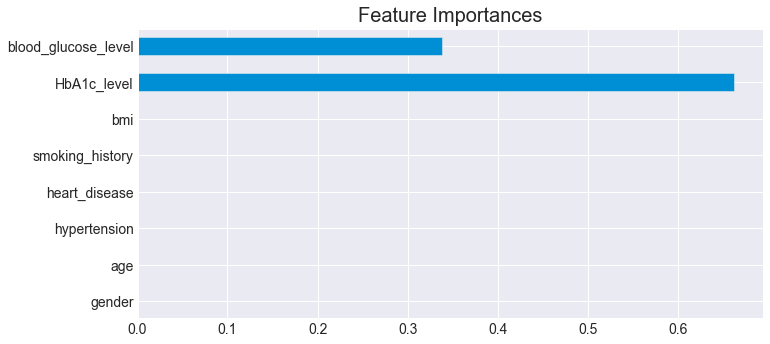

In [155]:
#Best Algorithms: Decision Tree 97%
#Feature Importances
plt.figure(figsize=(10, 5))
plt.title('Feature Importances', size=20)

plt.style.use('fivethirtyeight')
pd.Series(Tree.feature_importances_, index=data.columns).plot(kind='barh')
plt.show()

In [156]:
#Making Prediction System
input_data_1 = (3,42.0,0,0,2,21,10,75)
input_data_2 = (2,50.0,0,0,5,37.16,9.0,159)
input_data_3 = (2,50.0,0,0,5,37.16,6,120)

input_data_1 = np.asarray(input_data_1).reshape(1, -1)
input_data_2 = np.asarray(input_data_2).reshape(1, -1)
input_data_3 = np.asarray(input_data_3).reshape(1, -1)

In [157]:
print(f'First--> {input_data_1}')
print()
print(f'Second--> {input_data_2}')
print()
print(f'Third-> {input_data_3}')

First--> [[ 3. 42.  0.  0.  2. 21. 10. 75.]]

Second--> [[  2.    50.     0.     0.     5.    37.16   9.   159.  ]]

Third-> [[  2.    50.     0.     0.     5.    37.16   6.   120.  ]]


In [158]:
new_input_1 = scaler.transform(input_data_1)
new_input_2 = scaler.transform(input_data_2)
new_input_3 = scaler.transform(input_data_3)

In [159]:
prediction_1 = Tree.predict(new_input_1)
prediction_2 = Tree.predict(new_input_2)
prediction_3 = Tree.predict(new_input_3)

In [160]:
print(prediction_1[0])
if prediction_1[0] == 0:
      print('This person does not have diabetes')
else:
      print('This person has diabetes')

1
This person has diabetes


In [161]:
print(prediction_2[0])
if prediction_2[0] == 0:
      print('This person does not have diabetes')
else:
      print('This person has diabetes')

1
This person has diabetes


In [162]:
print(prediction_3[0])
if prediction_3[0] == 0:
      print('This person does not have diabetes')
else:
      print('This person has diabetes')

0
This person does not have diabetes
